# Group Details
## Group Name:
### Student 1:
### Student 2:
### Student 3:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def load_trajectory(filename, task):

    traj = np.load(filename)
    if task == 'task_1' or task == 'task_2':
        trajectory = traj['trajectory']
        energy = traj['energy']
        return trajectory, energy
    if task == 'task_3':
        trajectory = traj['trajectory']
        framework = traj['framework']
        energy = traj['energy']
        return trajectory, framework, energy

Below, you can find an example of how to load a trajectory. ```trajectory``` contains the particle position, velocity and charge data. ```energy``` contains the energy of the system at various timesteps. The shape of the arrays is as follows:

```trajectory```: ```(time, n_bodies, [x, y, v_x, v_y, q])```

```energy```: ```(time, 1)```

In [3]:
trajectory, energy = load_trajectory('data/task1_2/train/trajectory_0.npz', 'task_1')
print(f'Trajectory shape: {trajectory.shape}, Energy shape: {energy.shape}')

Trajectory shape: (40, 4, 5), Energy shape: (40, 1)


The following code provides an example of how to visualize a trajectory. Feel free to modify this code, or write your own function. When evaluating your model in task 2 and 3, keep in mind that you are only allowed to use the data at t=0 (the black dots in the visualization).

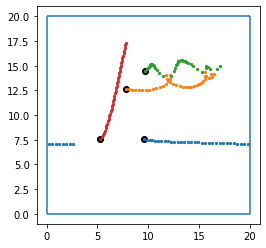

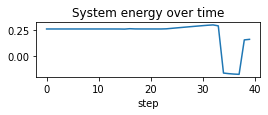

In [4]:
x = trajectory[...,0]
y = trajectory[...,1]

plt.figure(figsize=(4,4))
plt.vlines([0,20],0,20)
plt.hlines([0,20],0,20)

plt.scatter(x[0], y[0], c='black')

for i in range(x.shape[1]):
    plt.scatter(x[:,i], y[:,i], s=5)

plt.xlim(-1,21)
plt.ylim(-1,21)

plt.show()
plt.figure(figsize=(4,1))
plt.plot(energy)
plt.xlabel('step')
plt.title('System energy over time')
plt.show();

# Task 1

Implement task 1 below. Feel free to add extra code cells for different components of your implementation.

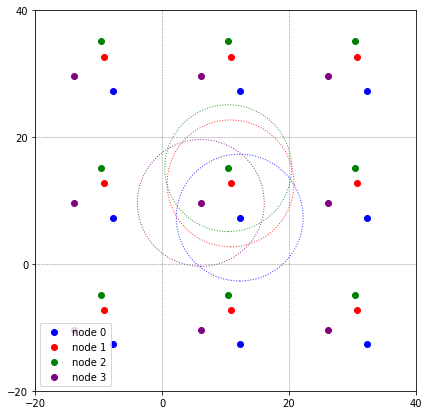

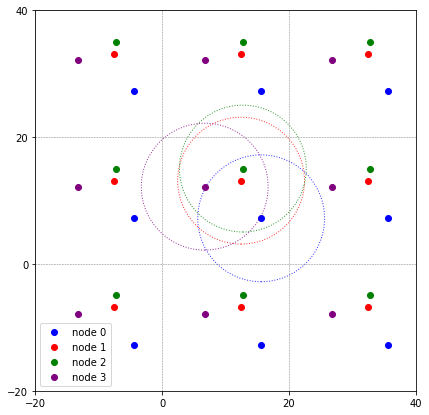

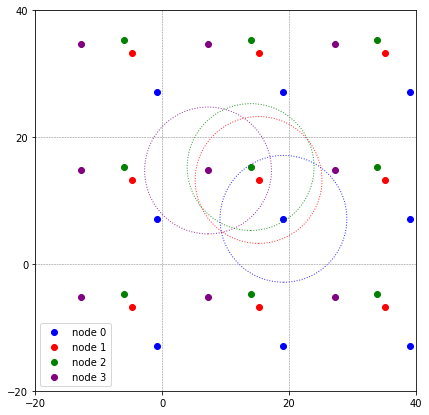

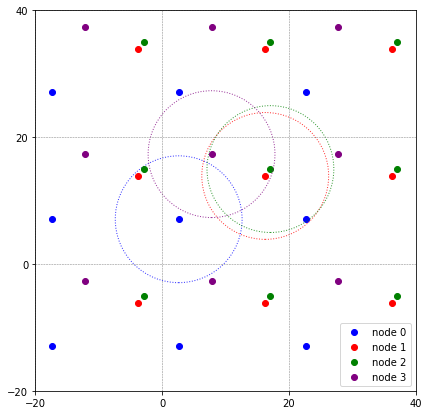

[[(0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2)],
 [(0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2)],
 [(0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2)],
 [(0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2)],
 [(0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2)],
 [(0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2)],
 [(0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2)],
 [(0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2)],
 [(0, 1),
  (0, 2),
  (0, 3),
  

In [5]:
def get_adjacency_list(trajectory):
    nodes_timestamp = []
    for state_on_t in trajectory:
        nodes=[]
        for j in range(len(state_on_t)):
            nodes.append((state_on_t[j][0],    state_on_t[j][1]))
            nodes.append((state_on_t[j][0],    state_on_t[j][1]-20))
            nodes.append((state_on_t[j][0],    state_on_t[j][1]+20))
            nodes.append((state_on_t[j][0]-20, state_on_t[j][1]))
            nodes.append((state_on_t[j][0]-20, state_on_t[j][1]-20))
            nodes.append((state_on_t[j][0]-20, state_on_t[j][1]+20))
            nodes.append((state_on_t[j][0]+20, state_on_t[j][1]))
            nodes.append((state_on_t[j][0]+20, state_on_t[j][1]-20))
            nodes.append((state_on_t[j][0]+20, state_on_t[j][1]+20))
        nodes_timestamp.append(nodes)

    all_adjacencies = []
    for t in range(len(trajectory)):
        original_nodes = []
        for i in range(len(trajectory[t])):
            original_nodes.append((trajectory[t][i][0], trajectory[t][i][1]))

        adjacency = []
        for i in range(len(original_nodes)):
            org_node = original_nodes[i]
            for j in range(len(nodes_timestamp[t])):
                node = nodes_timestamp[t][j]
                distance = math.sqrt((org_node[0] - node[0])**2 + (org_node[1] - node[1])**2)

                if distance <=10:
                    index_org_node = i
                    index_node = j//9
                    if index_node != index_org_node:
                        adjacency.append((index_org_node, index_node))
        all_adjacencies.append(adjacency)

        ### code for plotting the molecules
        if (t+1)%10==0:
            # Number of points per color group
            group_size = 9

            # Create lists to hold x and y coordinates for each color group
            x_coords_groups = []
            y_coords_groups = []
            num_groups = (len(nodes_timestamp[t]) + group_size - 1) // group_size  # Calculate the number of groups needed

            # Separate the data into groups
            for i in range(num_groups):
                start_index = i * group_size
                end_index = min(start_index + group_size, len(nodes_timestamp[t]))
                group = nodes_timestamp[t][start_index:end_index]
                x_coords, y_coords = zip(*group)
                x_coords_groups.append(x_coords)
                y_coords_groups.append(y_coords)

            # Define a list of colors (you can expand this list if you have more groups)
            colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black']
            fig, ax = plt.subplots(figsize= (7,7))

            # Create the scatter plot
            for i in range(num_groups):
                color = colors[i % len(colors)]  # Cycle through colors if there are more groups than colors
                ax.scatter(x_coords_groups[i], y_coords_groups[i], color=color, label=f'node {i}')

                # Add circle around the first point of each group
                first_x, first_y = x_coords_groups[i][0], y_coords_groups[i][0]
                circle = plt.Circle((first_x, first_y), 10, color=color, fill=False, linestyle='dotted', alpha=0.8)
                ax.add_patch(circle)
            # Set the x-axis and y-axis limits
            plt.xlim(-20, 40)
            plt.ylim(-20, 40)
            ax.set_aspect('equal')
            # Add grid lines to divide the space into 9 boxes (3x3 grid)
            plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
            plt.legend()
            # Customize the grid to create a 3x3 raster
            plt.xticks(range(-20, 41, 20))
            plt.yticks(range(-20, 41, 20))



            # Show the plot
            plt.show()
    return all_adjacencies
adj_lst = get_adjacency_list(trajectory)
adj_lst

# Task 2

Implement task 2 below. Feel free to add extra code cells for different components of your implementation.

# Task 3

In task 3, you also need to model the influences of the crystal. An example of loading a trajectory can be found below. The trajectory and energy data has the same shape as before, however, data regarding the crystal has been added. Since atoms belonging to the crystal do not move, this data does not have a time dimension when loaded. The shapes of the arrays are as follows:

```trajectory```: ```(time, n_bodies, [x, y, v_x, v_y, q])```

```energy```: ```(time, 1)```

```framework```:```(n_framework_atom, [x, y, q])```



In [6]:
trajectory, framework, energy = load_trajectory('data/task3/train/trajectory_0.npz', 'task_3')
print(f'Trajectory shape: {trajectory.shape}, Framework shape: {framework.shape}, Energy shape: {energy.shape}')

Trajectory shape: (40, 4, 5), Framework shape: (20, 3), Energy shape: (40, 1)


The following code provides an example of how to visualize a trajectory with a crystal. Feel free to modify this code, or write your own function. When evaluating your model in this task, keep in mind that you are only allowed to use the data at t=0 (the black dots in the visualization).

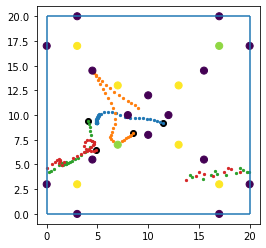

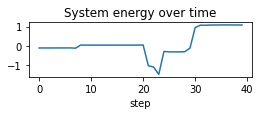

In [7]:
x = trajectory[...,0]
y = trajectory[...,1]

x_fw = framework[...,0]
y_fw = framework[...,1]
q_fw = framework[...,2]

plt.figure(figsize=(4,4))
plt.vlines([0,20],0,20)
plt.hlines([0,20],0,20)

plt.scatter(x[0], y[0], c='black')

for i in range(x.shape[1]):
    plt.scatter(x[:,i], y[:,i], s=5)

plt.scatter(x_fw, y_fw, c=q_fw, cmap='viridis', s=50)
# to also visualize the framework points along the boundaries
plt.scatter(x_fw+20, y_fw, c=q_fw, cmap='viridis', s=50)
plt.scatter(x_fw, y_fw+20, c=q_fw, cmap='viridis', s=50)
plt.scatter(x_fw+20, y_fw+20, c=q_fw, cmap='viridis', s=50)

plt.xlim(-1,21)
plt.ylim(-1,21)

plt.show()
plt.figure(figsize=(4,1))
plt.plot(energy)
plt.xlabel('step')
plt.title('System energy over time')
plt.show();

Implement task 3 below. Feel free to add extra code cells for different components of your implementation.